## ADULT DATASET ANALYSIS

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### DATA EXPLORATION

### Loading the dataset into pandas

In [12]:
df=pd.read_csv('adult.csv')

### Exploring the dataset fields

In [13]:
pd.set_option('display.max_columns', 80)

In [14]:
df.shape

(32561, 15)

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Looking at the descriptive statistics

In [16]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

### Replacing missing values with default Python NaN

In [18]:
df = df.replace('?', np.NaN)

In [19]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [20]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Missing row values are dropped

In [21]:
df = df.dropna(axis=0,how='any')

In [22]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### DESCRIPTIVE STATISTICS

### Looks like we have found some possible outliers in the data

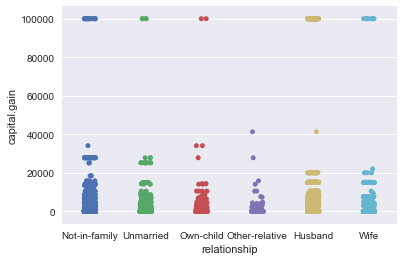

In [23]:
sns.stripplot(x='relationship',y='capital.gain',data=df,jitter= True)

### Males dominate the overall dataset including capital gain, capital loss, fnlweight and even hours of week

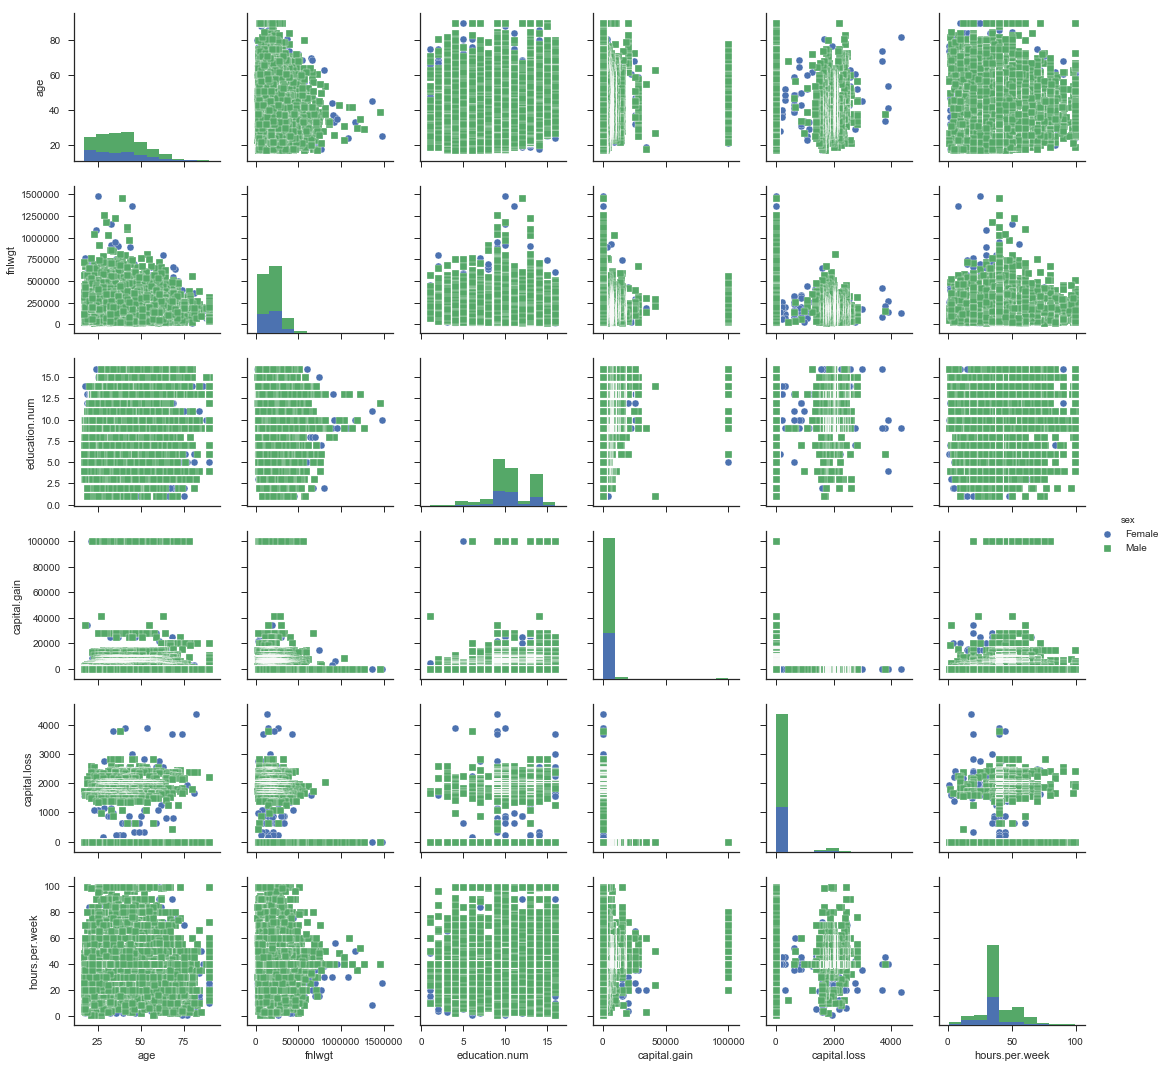

In [24]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='sex',markers=["o", "s"])

### American-Indian-Eskimo category dominates with more Capital gain and hours per week with White's showing overall majority

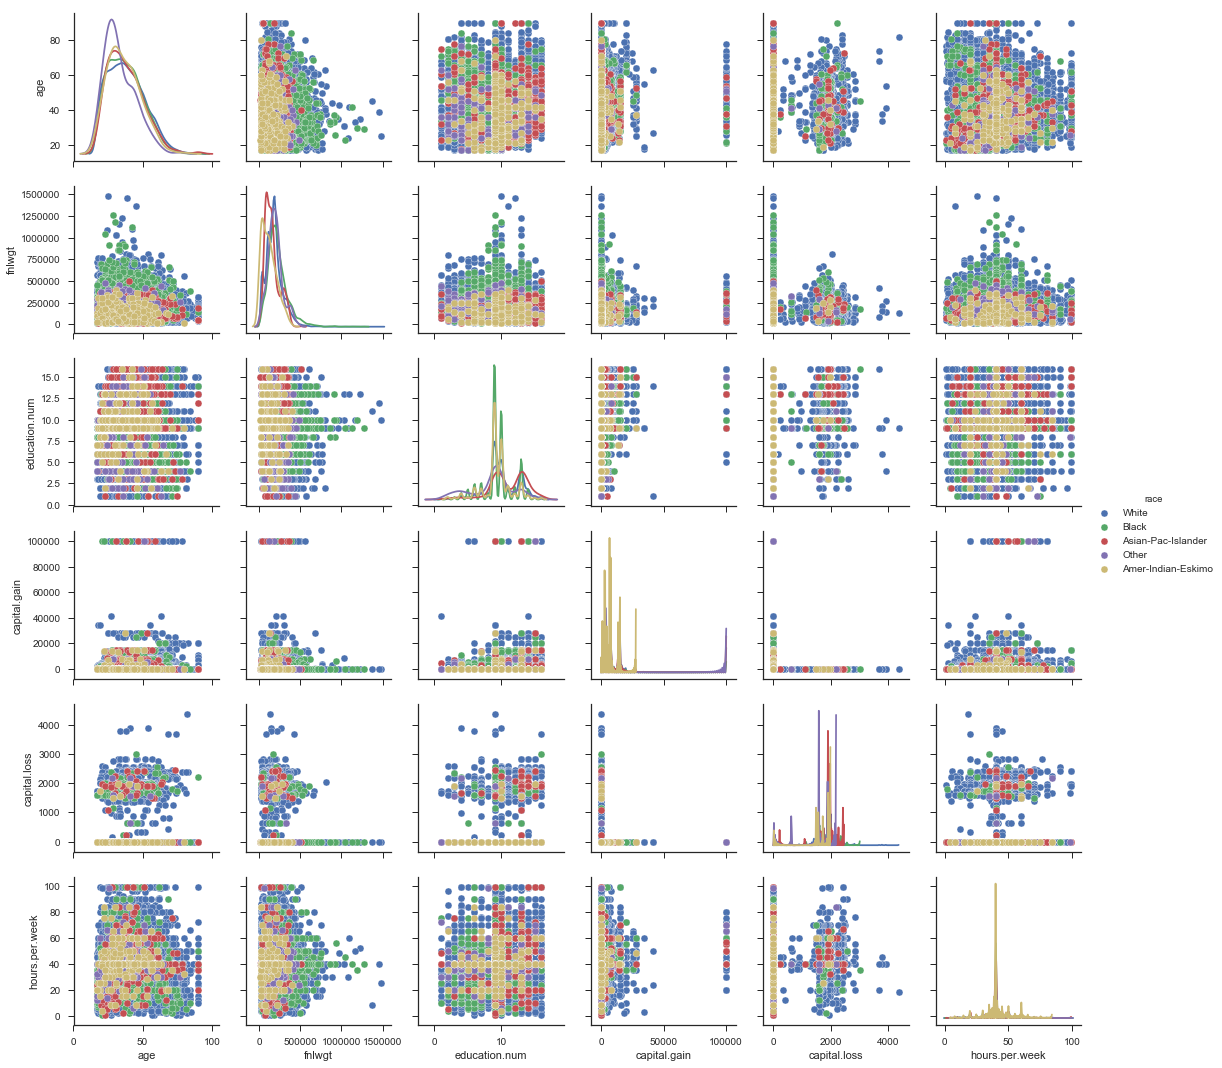

In [25]:
sns.pairplot(df, diag_kind="kde",hue='race')

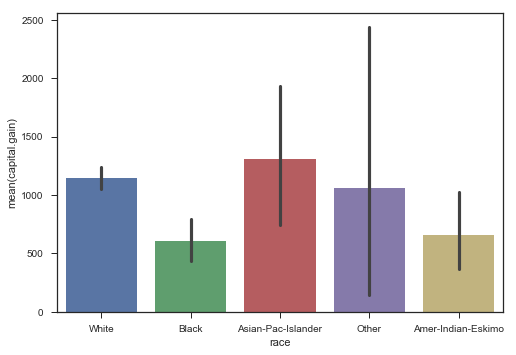

In [27]:
sns.barplot(x='race',y='capital.gain',data=df)

### Professor's have high capital gain with PhD and Masters to follow

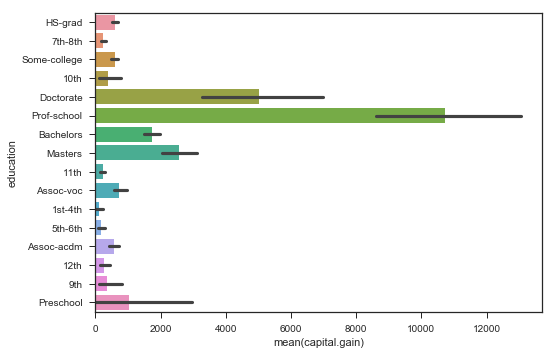

In [40]:
sns.barplot(y='education',x='capital.gain',data=df,orient="h")

### Self employed person's have high capital loss and Private and State gov with the lowest

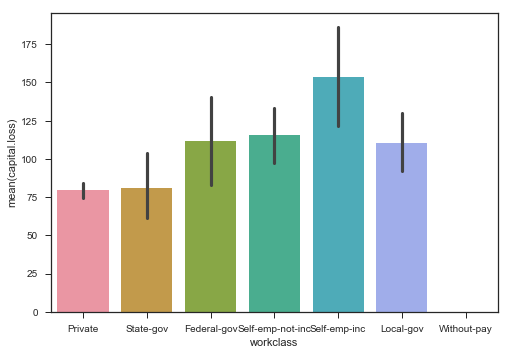

In [29]:
sns.barplot(x='workclass',y='capital.loss',data=df)

### Most people fall in the less than 50K income contributing to more than 1/3 of the dataset

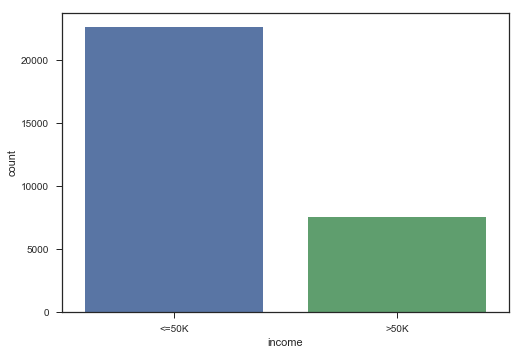

In [30]:
sns.countplot(x='income',data=df)